In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import io
import os
import sys
from typing import (
    Dict, 
    List
)
import warnings

from tqdm import tqdm
from datetime import datetime

import numpy as np
import pandas as pd
from joblib import load, dump

from optbinning import OptimalBinning

import seaborn as sns
import matplotlib.pyplot as plt

(CVXPY) May 22 04:07:36 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 22 04:07:36 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


In [3]:
sys.path.append(os.path.join(os.getcwd(), '..'))
from utils.metrics import Metrics

In [4]:
# set constants
COLUMNS_DICT: Dict[str, str] = {'OPTIN_11SCN_ML': 'Num', 
'G5_ND_SPECII': 'Num', 
'Marital_Status': 'Char', 
'SP_F2_33': 'Num', 
'AFF_B_09_01': 'Num', 
'TRD_A_20': 'Num', 
'SP_I_62_01': 'Num', 
'TRD_A_08': 'Num', 
'VM01_SP_VM2_15': 'Num', 
'GEN11_SP_N_92': 'Char', 
'SP_EDI_24': 'Num', 
'VM07_SP_VM1_11': 'Num', 
'ND_ECC_08': 'Num', 
'CLU_NPR_L1M': 'Num', 
'TRD_P_12': 'Num', 
'SP_H_41': 'Num', 
'G5_ND_SPACII': 'Num', 
'TRD_B_24': 'Num', 
'SP_I_61_01': 'Num', 
'TRD_O_16': 'Num', 
'SP_B2_21': 'Num', 
'TRD_P_11': 'Num', 
'VM01_SP_VM2_23': 'Num', 
'SP_G_37': 'Num', 
'E4_Q_17': 'Char', 
'TRD_C_07': 'Num', 
'TRD_C_03': 'Num', 
'TRD_B_20': 'Num', 
'SP_B2_18': 'Num', 
'TRD_B_22': 'Num', 
'SP_B3_23': 'Num', 
'TRD_P_10': 'Num', 
'SPA_F2_33': 'Num', 
'VM01_SP_VM2_14': 'Num', 
'TRD_B_19': 'Num', 
'VM01_SP_VM2_24': 'Num', 
'SP_G_38': 'Num', 
'TRD_O_05': 'Num', 
'SPA_B2_18': 'Num', 
'E1_A_11': 'Num', 
'E1_A_09': 'Num', 
'E1_A_10': 'Num', 
'PTSBR_L6M_NPR_L6M': 'Num', 
'E2_H_06': 'Num', 
'SP_F1_30': 'Num', 
'TRD_O_01': 'Num', 
'TRD_O_12': 'Num', 
'TRD_P_09': 'Num', 
'TRD_O_07': 'Num', 
'E1_A_05': 'Num', 
'ND_INC_03': 'Num', 
'VM01_SP_VM2_17': 'Num', 
'SP_B1_14': 'Num', 
'VM01_SP_VM2_18': 'Num', 
'GEN11_SP_N_91': 'Num', 
'GEN11_SP_EDI_07': 'Num', 
'AFF_T_66': 'Char', 
'PTBR_L3M_NPR_L3M': 'Num', 
'SP_EDI_03': 'Num', 
'ND_ECC_06': 'Num', 
'TRD_B_18': 'Num', 
'SPA_B2_19': 'Num', 
'SP_E1_28': 'Num', 
'SP_I_64_01': 'Num', 
'VM07_SP_VM1_18': 'Num', 
'NUM_DELINQ_ACCS': 'Num', 
'TRD_C_09': 'Num', 
'SP_F1_31': 'Num', 
'TRD_B_17': 'Num', 
'TRD_C_10': 'Num', 
'TRD_B_08': 'Num', 
'EA5_S_01': 'Num', 
'ND_HAC_04': 'Num', 
'VM01_SP_VM2_26': 'Num', 
'SPA_A_04': 'Num', 
'CLU_CLI_L6M_NPR_L6M': 'Num', 
'E1_B_06': 'Num', 
'TRD_A_04': 'Num', 
'SP_I_67_01': 'Char', 
'GEN11_SP_K_80': 'Char', 
'TRD_B_07': 'Num', 
'TRD_A_13': 'Num', 
'SP_I_63_01': 'Num', 
'SP_B2_20': 'Num', 
'E4_Q_04': 'Num', 
'TRD_RAG_01': 'Num', 
'TRD_A_03': 'Num', 
'VM09_SP_VM1_19': 'Num', 
'ND_ECC_04': 'Num', 
'VM08_SP_VM2_15': 'Num', 
'SP_B1_13': 'Num', 
'VAL_DELINQ_ACCS': 'Num', 
'AGE_MOST_RECENT_DELINQ': 'Num', 
'E1_A_03': 'Num', 
'E1_A_02': 'Num', 
'ND_ERL_01': 'Num', 
'VM08_SP_VM2_20': 'Num', 
'EA1_D_02': 'Num', 
'SP_I_56_01': 'Num', 
'ND_HAC_06': 'Num', 
'AFF_E_07_01': 'Num', 
'TRD_B_02': 'Num', 
'SP_EDI_17': 'Char', 
'TRD_B_36': 'Num', 
'TRD_O_06': 'Num', 
'SP_EDI_26': 'Num', 
'VM02_SP_VM1_16': 'Num', 
'TRD_B_05': 'Num', 
'E2_G_08': 'Num', 
'AFF_T_64_01': 'Char', 
'SP_EDI_15': 'Char', 
'TRD_B_32': 'Num', 
'SP_EDI_27': 'Num', 
'NUM_SETTLED_ACCS': 'Num', 
'TRD_B_06': 'Num', 
'VM08_SP_VM2_16': 'Num', 
'SP_EDI_37': 'Num', 
'VM04_SP_VM1_19': 'Num', 
'E2_H_04': 'Num', 
'TRD_B_52': 'Num', 
'SP_B1_11': 'Num', 
'AGE_MOST_RECENT_SETTD': 'Num', 
'AFF_E_29': 'Char', 
'NUM_INACTIVE_ACCS': 'Num', 
'NPD_NUM_NPD_SP_L18M': 'Num', 
'VM09_SP_VM1_04': 'Char', 
'AFF_T_07_01': 'Num', 
'TRD_B_53': 'Num', 
'NPD_NUM_EBAD_SP_L18M': 'Num', 
'VM03_SP_VM2_27': 'Num', 
'VM02_SP_VM1_18': 'Num', 
'SPA_B3_22': 'Num', 
'VM04_SP_VM1_21': 'Num', 
'VM04_SP_VM1_20': 'Num', 
'NPD_BAL_NPD_SP_L18M': 'Num', 
'SP_EDI_30': 'Num', 
'VM03_SP_VM2_28': 'Num', 
'TRD_A_17': 'Num', 
'VM10_SP_VM2_15': 'Num', 
'TRD_B_30': 'Num', 
'AFF_T_43': 'Num', 
'TRD_B_31': 'Num', 
'VM05_SP_VM1_19': 'Num', 
'AGE_MOST_RECENT': 'Num', 
'AFF_T_34_01': 'Num', 
'VM08_SP_VM2_14': 'Num', 
'TRD_C_05': 'Num', 
'ND_HAC_02': 'Num', 
'NDMAICH': 'Char', 
'VM09_SP_VM1_18': 'Num', 
'TRD_B_29': 'Num', 
'SP_J_61_01': 'Num', 
'SP_J_58_01': 'Num', 
'NPD_BAL_EBAD_SP_L18M': 'Num', 
'E1_B_08': 'Char', 
'VM08_SP_VM2_27': 'Num', 
'SP_EDI_22': 'Num', 
'VM05_SP_VM1_16': 'Num', 
'SP_EDI_31': 'Num', 
'VM10_SP_VM2_22': 'Num', 
'VM08_SP_VM2_18': 'Num', 
'TRD_A_21': 'Num', 
'TRD_A_18': 'Num', 
'VM08_SP_VM2_23': 'Num', 
'VM10_SP_VM2_27': 'Num', 
'VM08_SP_VM2_28': 'Num', 
'NUM_INACTIVE_ACCS_L36M': 'Num', 
'SPA_F3_36': 'Num', 
'E1_E_02': 'Num', 
'VM10_SP_VM2_23': 'Num', 
'SP_EDI_29': 'Num', 
'ND_HAC_03': 'Num', 
'E1_A_08': 'Num', 
'VM03_SP_VM2_24': 'Num', 
'TRD_STL_19': 'Num', 
'VM07_SP_VM1_26': 'Num', 
'VM04_SP_VM1_03': 'Char', 
'EA4_P_01': 'Char', 
'TRD_A_12': 'Num', 
'SP_I_66_01': 'Char', 
'TRD_STL_20': 'Num', 
'VM08_SP_VM2_07': 'Num', 
'VM01_SP_VM2_28': 'Num', 
'VM01_SP_VM2_29': 'Num', 
'VM04_SP_VM1_04': 'Char', 
'TRD_P_23': 'Num', 
'AFF_S_22_01': 'Char', 
'VM08_SP_VM2_17': 'Num', 
'AFF_C_06': 'Char', 
'GEN11_SP_J_58': 'Num', 
'E2_K_02': 'Num', 
'SP_B2_19': 'Num', 
'SP_EDI_12': 'Char', 
'VM03_SP_VM2_16': 'Num', 
'SP_EDI_19': 'Char', 
'VM10_SP_VM2_28': 'Num', 
'VM10_SP_VM2_29': 'Num', 
'AFF_V_19': 'Num', 
'SPA_A_01': 'Num', 
'AFF_S_03_01': 'Char', 
'VM04_SP_VM1_15': 'Num', 
'E1_B_13': 'Num', 
'VM08_SP_VM2_03': 'Char', 
'VM10_SP_VM2_16': 'Num', 
'VM04_SP_VM1_11': 'Num', 
'TRD_P_36': 'Num', 
'EA5_U_01': 'Num', 
'VM02_SP_VM1_05': 'Char', 
'GEN11_SP_L_81': 'Num', 
'HC_C_01': 'Num', 
'AFF_C_03_01': 'Char', 
'VM02_SP_VM1_11': 'Num', 
'VM01_SP_VM2_34': 'Num', 
'TRD_A_16': 'Num', 
'E2_J_02': 'Num', 
'VM01_SP_VM2_32': 'Num', 
'VM03_SP_VM2_07': 'Num', 
'VM08_SP_VM2_34': 'Num', 
'E2_H_01': 'Num', 
'VM01_SP_VM2_02': 'Char', 
'ND_ECC_05': 'Num', 
'AFF_M_01_01': 'Num', 
'TRD_O_08': 'Num', 
'VM05_SP_VM1_20': 'Num', 
'VM05_SP_VM1_21': 'Num', 
'NPD_NUM_NPD_SP_L12M': 'Num', 
'VM04_SP_VM1_26': 'Num', 
'NPD_NUM_EBAD_SP_L12M': 'Num', 
'PD_B_06': 'Num', 
'E2_H_02': 'Num', 
'VM04_SP_VM1_22': 'Num', 
'VM04_SP_VM1_16': 'Num', 
'TRD_A_23': 'Num', 
'AFF_T_82_01': 'Char', 
'VM04_SP_VM1_18': 'Num', 
'E1_B_12': 'Num', 
'VM09_SP_VM1_20': 'Num', 
'VM09_SP_VM1_21': 'Num', 
'TRD_RAG_13_AIQ2': 'Char', 
'VM08_SP_VM2_19': 'Num', 
'ND_PSD_05': 'Num', 
'SP_B1_15': 'Num', 
'TRD_A_19': 'Num', 
'EA2_Q_02': 'Num', 
'NPD_BAL_NPD_SP_L12M': 'Num', 
'ND_HAC_10': 'Num', 
'VM04_SP_VM1_01': 'Num', 
'GEN11_SP_L_78': 'Num', 
'SP_EDI_32': 'Num', 
'VM05_SP_VM1_04': 'Char', 
'AFF_V_09': 'Num', 
'ND_HAC_05': 'Num', 
'VM04_SP_VM1_08': 'Num', 
'NDMAUNSECARR': 'Char', 
'ND_ECC_01': 'Num', 
'E2_K_01': 'Num', 
'NO_CA_L3M': 'Num', 
'ND_ECC_10': 'Num', 
'VM04_SP_VM1_07': 'Num', 
'HC_B_01': 'Num', 
'E2_H_11': 'Num', 
'SPA_H_41': 'Num', 
'E2_G_09': 'Num', 
'ND_PSD_11': 'Num', 
'TRD_P_08': 'Num', 
'SP_J_60_01': 'Num', 
'SP_J_56_01': 'Num', 
'PD_F_21': 'Num', 
'VM04_SP_VM1_06': 'Num', 
'E1_B_04': 'Num', 
'SPA_E1_26': 'Num', 
'SP_C_24': 'Char', 
'VM10_SP_VM2_18': 'Num', 
'VM10_SP_VM2_30': 'Num', 
'NPD_BAL_EBAD_SP_L12M': 'Num', 
'AFF_V_17_01': 'Num', 
'AFF_T_56_01': 'Num', 
'SP_EDI_38': 'Num', 
'TRD_B_49': 'Num', 
'VM07_SP_VM1_10': 'Num', 
'E2_G_01': 'Num', 
'AFF_T_67_01': 'Char', 
'AFF_C_19_01': 'Char', 
'VM06_SP_VM1_05': 'Char', 
'NPD_NUM_NPD_SPA_L18M': 'Num', 
'NPD_NUM_EBAD_SPA_L18M': 'Num', 
'AFF_V_13_01': 'Num', 
'VM10_SP_VM2_07': 'Num', 
'TRD_RAG_13': 'Char', 
'ND_LNK_01': 'Char', 
'ND_ECC_03': 'Num', 
'VM01_SP_VM2_12': 'Num', 
'EA4_Q_06': 'Char', 
'VM03_SP_VM2_26': 'Num'} 
MIN_IV: float = 0.1
CORR_PEARSON_CUT_OFF: float = 0.75
TARGET_NAME: str = 'GB6_Flag_2Limit'
PALETTE_TARGET: Dict[str, str] = {
    'G': 'green',
    'B': 'red',
    'I': 'black'
}
TARGET_BIN: str = f'_{TARGET_NAME}_bin'

PROJECT_PATH: str = os.path.join(os.getcwd(), '..')
DATA_PATH: str = os.path.join(PROJECT_PATH, 'data')
OPT_BIN_PATH: str = os.path.join(os.path.join(PROJECT_PATH, 'objects'), 'optbinners')

In [5]:
# read data
df: pd.DataFrame = pd.read_csv(os.path.join(DATA_PATH, 'final_aiq2.csv'))

C:\Users\hdychko\AppData\Local\Temp\ipykernel_35684\1622656214.py:2: DtypeWarning: Columns (310,1307,1349,1351,1352,1400,1401,1402,1403,1404,1405) have mixed types. Specify dtype option on import or set low_memory=False.
  df: pd.DataFrame = pd.read_csv(os.path.join(DATA_PATH, 'final_aiq2.csv'))


In [6]:
print('Number of rows: %.0f; columns: %.0f' % df.shape)

Number of rows: 110462; columns: 1774


In [7]:
assert df[COLUMNS_DICT.keys()].shape[1] == len(COLUMNS_DICT)

# Preprocessing

# Convert dates to the corresponding types

In [8]:
for col in ['_RDATE_EOM', '_RDATE']:
    df[col] = pd.to_datetime(df[col]).dt.date

In [9]:
print('Available date range:')
df['_RDATE'].agg(['min', 'max'])

Available date range:


min    2021-06-30
max    2023-11-30
Name: _RDATE, dtype: object

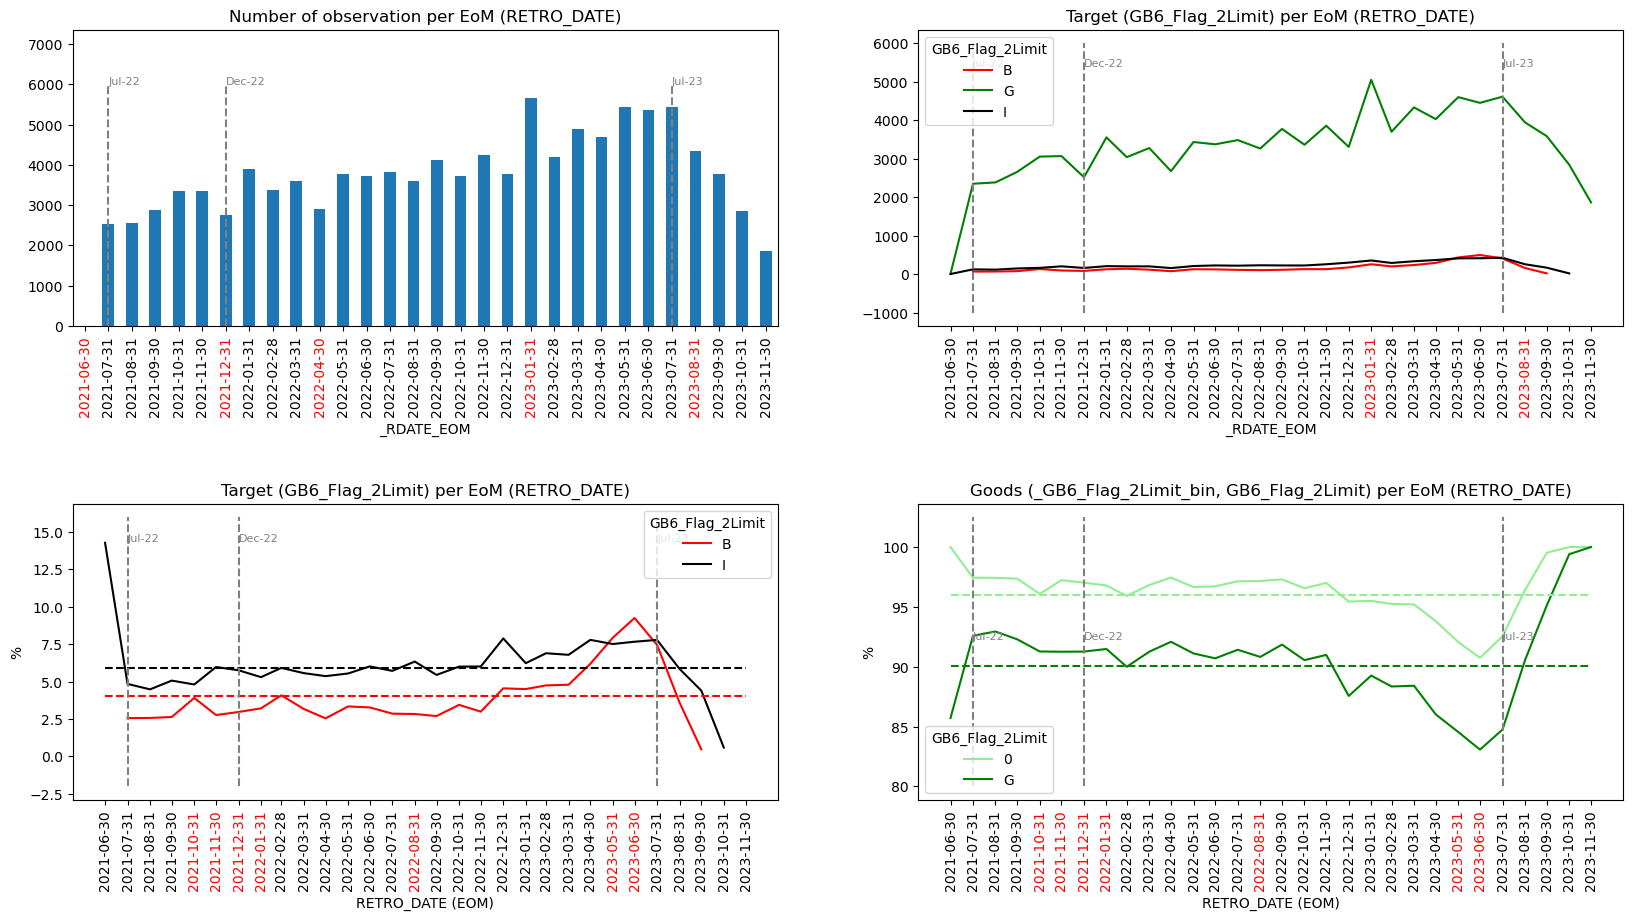

In [10]:
#  distributions 
# - number of observations per month
# - target as is, binary 
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
plt.subplots_adjust(hspace=0.6)

_ = df['_RDATE_EOM'].value_counts(sort=False).sort_index().plot(kind='bar',  title='Number of observation per EoM (RETRO_DATE)', ax=ax[0, 0])

for date_val in ['2021-06-30', '2021-12-31', '2022-04-30', '2023-01-31','2023-08-31']: 
    _ = ax[0, 0].get_xticklabels()[np.where(np.sort(df['_RDATE_EOM'].unique()) == pd.to_datetime(date_val).date())[0][0]].set_color("red")

_ = pd.DataFrame(df.groupby(['_RDATE_EOM'])[TARGET_NAME].value_counts(sort=False).sort_index().rename('n')).reset_index()\
    .pivot(index='_RDATE_EOM', columns=TARGET_NAME, values='n')\
    .plot\
    .line(
        color=PALETTE_TARGET,
        title=f'Target ({TARGET_NAME}) per EoM (RETRO_DATE)', 
        rot=90, 
        xticks=np.sort(df._RDATE_EOM.unique()),
        ax=ax[0, 1]
    )
_ = ax[0, 1].get_xticklabels()[np.where(np.sort(df['_RDATE_EOM'].unique()) == pd.to_datetime('2023-01-31').date())[0][0]].set_color("red")
_ = ax[0, 1].get_xticklabels()[np.where(np.sort(df['_RDATE_EOM'].unique()) == pd.to_datetime('2023-08-31').date())[0][0]].set_color("red")


_ = pd.DataFrame((df.groupby(['_RDATE_EOM'])[TARGET_NAME].value_counts(normalize=True, sort=False) * 100).sort_index().rename('n')).reset_index()\
    .pivot(index='_RDATE_EOM', columns=TARGET_NAME, values='n')\
    .drop(columns=['G'])\
    .plot\
    .line(
        color=PALETTE_TARGET,
        title=f'Target ({TARGET_NAME}) per EoM (RETRO_DATE)', 
        rot=90, 
        xticks=np.sort(df._RDATE_EOM.unique()),
        ylabel='%', 
        xlabel = 'RETRO_DATE (EOM)', 
        ax=ax[1, 0]
    )
for date_value in ['2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31', '2022-08-31', '2023-05-31', '2023-06-30']:
    _ = ax[1, 0].get_xticklabels()[np.where(np.sort(df['_RDATE_EOM'].unique()) == pd.to_datetime(date_value).date())[0][0]].set_color("red")

_ = ax[1, 0].hlines(y=df[TARGET_NAME].value_counts(normalize=True)['B'] * 100, xmin=pd.to_datetime('2021-06-30').date(), xmax=pd.to_datetime('2023-11-30').date(), color=PALETTE_TARGET['B'], label='B-Overall', linestyle='dashed')
_ = ax[1, 0].hlines(y=df[TARGET_NAME].value_counts(normalize=True)['I'] * 100, xmin=pd.to_datetime('2021-06-30').date(), xmax=pd.to_datetime('2023-11-30').date(), color=PALETTE_TARGET['I'], label='I-Overall', linestyle='dashed')
# _ = plt.legend()

_ = pd.DataFrame((df.groupby(['_RDATE_EOM'])[TARGET_BIN].value_counts(normalize=True, sort=False) * 100).sort_index().rename('n')).reset_index()\
    .pivot(index='_RDATE_EOM', columns=TARGET_BIN, values='n')\
    .drop(columns=[1])\
    .plot\
    .line(
        color={0: 'lightgreen', 1: 'red'},
        title=f'Target ({TARGET_BIN}) per EoM (RETRO_DATE)', 
        rot=90, 
        xticks=np.sort(df._RDATE_EOM.unique()),
        ylabel='%', 
        xlabel = 'RETRO_DATE (EOM)', 
        ax=ax[1, 1]
    )
_ = pd.DataFrame((df.groupby(['_RDATE_EOM'])[TARGET_NAME].value_counts(normalize=True, sort=False) * 100).sort_index().rename('n')).reset_index()\
    .pivot(index='_RDATE_EOM', columns=TARGET_NAME, values='n')\
    .drop(columns=['B', 'I'])\
    .plot\
    .line(
        color={'G': 'green'},
        title=f'Goods ({TARGET_BIN}, {TARGET_NAME}) per EoM (RETRO_DATE)', 
        rot=90, 
        xticks=np.sort(df._RDATE_EOM.unique()),
        ylabel='%', 
        xlabel = 'RETRO_DATE (EOM)', 
        ax=ax[1, 1]
    )
for date_value in ['2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31', '2022-08-31', '2023-05-31', '2023-06-30']:
    _ = ax[1, 1].get_xticklabels()[np.where(np.sort(df['_RDATE_EOM'].unique()) == pd.to_datetime(date_value).date())[0][0]].set_color("red")

_ = ax[1, 1].hlines(y=df[TARGET_NAME].value_counts(normalize=True)['G'] * 100, xmin=pd.to_datetime('2021-06-30').date(), xmax=pd.to_datetime('2023-11-30').date(), color='green', label='G-Overall', linestyle='dashed')
_ = ax[1, 1].hlines(y=df[TARGET_BIN].value_counts(normalize=True)[0] * 100, xmin=pd.to_datetime('2021-06-30').date(), xmax=pd.to_datetime('2023-11-30').date(), color='lightgreen', label='0-Overall', linestyle='dashed')

y_values = [elem._y for elem in ax[0, 0].get_yticklabels()]
y_min, y_max = min(y_values), max(y_values)
x_vals = list(np.sort(df['_RDATE_EOM'].unique()))

_ = ax[0, 0].vlines(x=x_vals.index(pd.to_datetime('2021-07-31').date()), ymin=y_min, ymax=y_max, color='gray', linestyle='dashed')
_ = ax[0, 0].annotate('Jul-22', (x_vals.index(pd.to_datetime('2021-07-31').date()), y_max), color='gray', fontsize=8)

_ = ax[0, 0].vlines(x=x_vals.index(pd.to_datetime('2021-12-31').date()), ymin=y_min, ymax=y_max, color='gray', linestyle='dashed')
_ = ax[0, 0].annotate('Dec-22', (x_vals.index(pd.to_datetime('2021-12-31').date()), y_max), color='gray', fontsize=8)

_ = ax[0, 0].vlines(x=x_vals.index(pd.to_datetime('2023-07-31').date()), ymin=y_min, ymax=y_max, color='gray', linestyle='dashed')
_ = ax[0, 0].annotate('Jul-23', (x_vals.index(pd.to_datetime('2023-07-31').date()), y_max), color='gray', fontsize=8)

for i in range(2):
    for j in range(2):
        y_values = [elem._y for elem in ax[i, j].get_yticklabels()]
        y_min, y_max = min(y_values), max(y_values)

        _ = ax[i, j].vlines(x=pd.to_datetime('2021-07-31').date(), ymin=y_min, ymax=y_max, color='gray', linestyle='dashed')
        _ = ax[i, j].annotate('Jul-22', (pd.to_datetime('2021-07-31').date(), y_max*0.9), color='gray', fontsize=8)
        
        _ = ax[i, j].vlines(x=pd.to_datetime('2021-12-31').date(), ymin=y_min, ymax=y_max, color='gray', linestyle='dashed')
        _ = ax[i, j].annotate('Dec-22', (pd.to_datetime('2021-12-31').date(), y_max*0.9), color='gray', fontsize=8)
        
        _ = ax[i, j].vlines(x=pd.to_datetime('2023-07-31').date(), ymin=y_min, ymax=y_max, color='gray', linestyle='dashed')
        _ = ax[i, j].annotate('Jul-23', (pd.to_datetime('2023-07-31').date(), y_max*0.9), color='gray', fontsize=8)


In [11]:
TRAIN_BIN_FROM: datetime.date = pd.to_datetime('2021-07-01').date()
TRAIN_BIN_TO: datetime.date = pd.to_datetime('2021-12-01').date()

In [12]:
df_train: pd.DataFrame = df[
    (df._RDATE >= TRAIN_BIN_FROM) &
    (df._RDATE < TRAIN_BIN_TO)
]

In [13]:
print('Target population of the selected period:')
df_train.groupby(['_RDATE_EOM'])[TARGET_NAME].value_counts(sort=False).sort_index().rename('n')

Target population of the selected period:


_RDATE_EOM  GB6_Flag_2Limit
2021-07-31  B                    65
            G                  2348
            I                   123
2021-08-31  B                    66
            G                  2383
            I                   115
2021-09-30  B                    76
            G                  2657
            I                   146
2021-10-31  B                   131
            G                  3054
            I                   161
2021-11-30  B                    93
            G                  3067
            I                   201
Name: n, dtype: int64

# Binning

In [14]:
CAT_COLS: List[str] = [k for k, v in COLUMNS_DICT.items() if v.lower().strip() != 'num']
NUM_COLS: List[str] = [k for k, v in COLUMNS_DICT.items() if v.lower().strip() == 'num']

In [15]:
#  check if something was missed
assert len(CAT_COLS) + len(NUM_COLS) == len(COLUMNS_DICT)

In [16]:
exceptions = []
for col_name, col_type in tqdm(COLUMNS_DICT.items()):
    try: 
        unique_vals = df[col_name].unique()
        special_cases: List[str] = []
        dict_to_replace: Dict[str, float] = dict()
        for elem in unique_vals:
            try:
                dict_to_replace[elem] = float(elem)
            except ValueError:
                special_cases += [elem] 
        optb = OptimalBinning(
            name=col_name, 
            dtype="categorical" if (col_type.lower().strip() != 'num') | (len(special_cases) == len(unique_vals)) else 'numerical', 
            solver="mip",
            special_codes=special_cases if len(special_cases) != len(unique_vals) else None,
            monotonic_trend='auto_asc_desc' 
        )
        optb.fit(df_train[col_name].replace(dict_to_replace).values, df_train[TARGET_BIN].values)
        df[col_name + 'OptBin'] = optb.transform(df[col_name].replace(dict_to_replace).values, metric="woe")
        dump(optb, os.path.join(OPT_BIN_PATH, f'{col_name}.jblb'))
    except Exception as e:
        exceptions += [(col_name, e)]

 32%|█████████████████████████▉                                                       | 94/294 [00:53<00:36,  5.41it/s]C:\Users\hdychko\AppData\Local\Temp\ipykernel_35684\3617170481.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name + 'OptBin'] = optb.transform(df[col_name].replace(dict_to_replace).values, metric="woe")
 33%|██████████████████████████▍                                                      | 96/294 [00:53<00:30,  6.50it/s]C:\Users\hdychko\AppData\Local\Temp\ipykernel_35684\3617170481.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fr

In [17]:
print('If any Exception: ', len(exceptions))

If any Exception:  0


In [18]:
print('Number of rows: %.0f; columns: %.0f' % df.shape)

Number of rows: 110462; columns: 2068


# Check correlations

In [19]:
df_info = pd.DataFrame(
    {
        'Type': COLUMNS_DICT.values()
    }, 
    index=[elem + 'OptBin' for elem in COLUMNS_DICT.keys()]
)
df_info['AsFeature'] = None
df_info['Comment'] = ''
df_info

,Type,AsFeature,Comment
OPTIN_11SCN_MLOptBin,Num,None,
G5_ND_SPECIIOptBin,Num,None,
Marital_StatusOptBin,Char,None,
SP_F2_33OptBin,Num,None,
AFF_B_09_01OptBin,Num,None,
...,...,...,...
ND_LNK_01OptBin,Char,None,
ND_ECC_03OptBin,Num,None,
VM01_SP_VM2_12OptBin,Num,None,
EA4_Q_06OptBin,Char,None,


### Compute IV

In [20]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

cat_failed_cols = []
df_iv = pd.DataFrame()
for col in tqdm([elem + 'OptBin' for elem in COLUMNS_DICT.keys()]):
    try:
        m = Metrics()
        df_iv_temp = m.iv_categorical(
            df_actual=df,
            feature_col=col,
            target_col=TARGET_BIN,
            positive_inf_offset=0.003,
            negative_inf_offset=0.003,
        )[0]
        df_iv = pd.concat((df_iv, df_iv_temp))
    except Exception as e:
        cat_failed_cols += [(col, e)]

100%|███████████████████████████████████████████████████████████████████████████████| 294/294 [00:02<00:00, 107.85it/s]


In [21]:
print('If any Exceptions: ', len(cat_failed_cols))

If any Exceptions:  0


In [22]:
df_iv.head()

,Feature,IV
0,OPTIN_11SCN_MLOptBin,1.412301
0,G5_ND_SPECIIOptBin,0.167943
0,Marital_StatusOptBin,0.768844
0,SP_F2_33OptBin,0.670952
0,AFF_B_09_01OptBin,0.592453


In [23]:
print('Before merge: ', df_info.shape)
df_info = pd.merge(df_info, df_iv, how='left', left_index=True, right_on='Feature')
df_info = df_info.set_index('Feature')
print('After merge: ', df_info.shape)
print(df_info.head())

Before merge:  (294, 3)
After merge:  (294, 4)
                      Type AsFeature Comment        IV
Feature                                               
OPTIN_11SCN_MLOptBin   Num      None          1.412301
G5_ND_SPECIIOptBin     Num      None          0.167943
Marital_StatusOptBin  Char      None          0.768844
SP_F2_33OptBin         Num      None          0.670952
AFF_B_09_01OptBin      Num      None          0.592453


In [24]:
assert df_info.shape[0] == len(COLUMNS_DICT)
assert not df_info.IV.isna().any()

### Check correlation

In [25]:
for col in tqdm([elem + 'OptBin' for elem in COLUMNS_DICT.keys()]):
    if ('|Corr(' in df_info.loc[col, 'Comment']):
        continue
    if df[col].nunique() < 2:
        df_info.loc[name, 'AsFeature'] = '-'
        df_info.loc[name, 'Comment'] += f';  less than 2 unique values;'
        continue
        
    col_corr = df[
        [elem + 'OptBin' for elem in COLUMNS_DICT.keys()]
    ].corrwith(df[col], method='pearson', numeric_only=False)

    candidates = list(col_corr[col_corr.abs() >= CORR_PEARSON_CUT_OFF].index)

    canddidates_names = df_info.loc[candidates].index.tolist()
    canddidates_values = df_info.loc[candidates].IV.values

    cand_indx = canddidates_values.argmax()

    df_info.loc[canddidates_names[cand_indx], 'AsFeature'] = '+' \
        if (df_info.loc[canddidates_names[cand_indx], 'AsFeature'] == '+') | \
            ((df_info.loc[canddidates_names[cand_indx], 'AsFeature'] is np.nan)) |\
            (df_info.loc[canddidates_names[cand_indx], 'AsFeature'] is None) \
        else '-'
        
    df_info.loc[canddidates_names[cand_indx], 'Comment'] = df_info.loc[canddidates_names[cand_indx], 'Comment'] + (
        '; Correlation checked;' \
            if ('; Correlation checked;' not in df_info.loc[canddidates_names[cand_indx], 'Comment']) & \
                ('|Corr(' not in df_info.loc[canddidates_names[cand_indx], 'Comment']) \
            else ''
    )

    canddidates_names.remove(canddidates_names[cand_indx])
    if len(canddidates_names) > 0:
        for name in canddidates_names:
            df_info.loc[name, 'AsFeature'] = '-'
            df_info.loc[name, 'Comment'] += f';  |Corr({col}, {name})| >= {CORR_PEARSON_CUT_OFF}'

100%|████████████████████████████████████████████████████████████████████████████████| 294/294 [01:43<00:00,  2.85it/s]


In [26]:
df_info

,Type,AsFeature,Comment,IV
Feature,,,,
OPTIN_11SCN_MLOptBin,Num,+,; Correlation checked;,1.412301
G5_ND_SPECIIOptBin,Num,+,; Correlation checked;,0.167943
Marital_StatusOptBin,Char,+,; Correlation checked;,0.768844
SP_F2_33OptBin,Num,+,; Correlation checked;,0.670952
AFF_B_09_01OptBin,Num,+,; Correlation checked;,0.592453
...,...,...,...,...
ND_LNK_01OptBin,Char,+,; Correlation checked;,0.009310
ND_ECC_03OptBin,Num,+,; Correlation checked;,0.007091
VM01_SP_VM2_12OptBin,Num,-,"; |Corr(VM01_SP_VM2_23OptBin, VM01_SP_VM2_12O...",0.166329


In [27]:
print('If any Nulls in `AsFeature`: ', df_info['AsFeature'].isna().any())

If any Nulls in `AsFeature`:  True


In [28]:
# examples with Nulls in `AsFeature`:
print(df_info[df_info['AsFeature'].isna()])

print('\nNumber of Unique values of this features: ')
l = []
for i in range(sum(df_info['AsFeature'].isna())):
    l += list(df[df_info[df_info['AsFeature'].isna()].index.values[i]].unique())
print(pd.Series(l).unique())

                      Type AsFeature Comment   IV
Feature                                          
TRD_A_13OptBin         Num      None          0.0
VM03_SP_VM2_28OptBin   Num      None          0.0
ND_HAC_02OptBin        Num      None          0.0
EA4_P_01OptBin        Char      None          0.0
E1_B_13OptBin          Num      None          0.0
TRD_P_36OptBin         Num      None          0.0
HC_C_01OptBin          Num      None          0.0
TRD_O_08OptBin         Num      None          0.0
PD_B_06OptBin          Num      None          0.0
E1_B_12OptBin          Num      None          0.0
TRD_A_19OptBin         Num      None          0.0
ND_HAC_10OptBin        Num      None          0.0
ND_HAC_05OptBin        Num      None          0.0
NDMAUNSECARROptBin    Char      None          0.0
ND_ECC_10OptBin        Num      None          0.0
HC_B_01OptBin          Num      None          0.0
E2_H_11OptBin          Num      None          0.0
SPA_H_41OptBin         Num      None          0.0


In [29]:
print('Number of features with:')
print('- (`AsFeature`="+") & (IV >= 0.1): ', df_info[(df_info.AsFeature == '+') & (df_info.IV >= MIN_IV)].shape[0])

Number of features with:
- (`AsFeature`="+") & (IV >= 0.1):  50


In [30]:
SELECTED_COLS = df_info[(df_info.AsFeature == '+') & (df_info.IV >= 0.1)].index

In [31]:
# check monotonicity for a random selected features
i = 0
df[[SELECTED_COLS[i][:-len('OptBin')], SELECTED_COLS[i]]].drop_duplicates().sort_values(SELECTED_COLS[i][:-len('OptBin')])

,OPTIN_11SCN_ML,OPTIN_11SCN_MLOptBin
32,-998,-1.483852
55,-997,-1.483852
83455,21,-1.483852
64812,49,-1.483852
59941,59,-1.483852
...,...,...
69327,1389,2.994747
16614,1391,2.994747
68028,1398,2.994747
81450,1404,2.994747


In [32]:
df_info.head()

,Type,AsFeature,Comment,IV
Feature,,,,
OPTIN_11SCN_MLOptBin,Num,+,; Correlation checked;,1.412301
G5_ND_SPECIIOptBin,Num,+,; Correlation checked;,0.167943
Marital_StatusOptBin,Char,+,; Correlation checked;,0.768844
SP_F2_33OptBin,Num,+,; Correlation checked;,0.670952
AFF_B_09_01OptBin,Num,+,; Correlation checked;,0.592453


In [33]:
df_info = df_info.reset_index()
df_info['InitFeature'] = [elem[:-len('OptBin')] for elem in df_info.Feature]

In [34]:
df_info.head()

,Feature,Type,AsFeature,Comment,IV,InitFeature
0,OPTIN_11SCN_MLOptBin,Num,+,; Correlation checked;,1.412301,OPTIN_11SCN_ML
1,G5_ND_SPECIIOptBin,Num,+,; Correlation checked;,0.167943,G5_ND_SPECII
2,Marital_StatusOptBin,Char,+,; Correlation checked;,0.768844,Marital_Status
3,SP_F2_33OptBin,Num,+,; Correlation checked;,0.670952,SP_F2_33
4,AFF_B_09_01OptBin,Num,+,; Correlation checked;,0.592453,AFF_B_09_01


In [35]:
df_init = pd.read_csv(os.path.join(DATA_PATH, 'Experian - Data Analysis(Features).csv'), encoding='cp1252')
df_init.head()

,Block,Unnamed: 1,Variable,Label,Classification,Unnamed: 5,Unnamed: 6,Applicability for modelling from the definition,Variable.1,Feature,...,% not nulls,# unique values,dtype,IV,"As Feature\n(based on IV, not null, #unique)",As Feature \nH & P,Comment,_dtype_theoretical,Unnamed: 19,Unnamed: 20
0,NaN,NaN,STAT1,Most recent Status associated with the account...,CAIS Status (DB),Char(1),"'Char(1)',",-,STAT1,STAT1,...,100.00,10.0,object,3.93,+,False,; Correlation checked;,NaN,NaN,NaN
1,NaN,NaN,STAT2,Second most recent Status associated with the ...,CAIS Status (DB),Char(1),"'Char(1)',",-,STAT2,STAT2,...,97.19,11.0,object,3.90,-,False,; lower than 100% not null values;; |Corr(STA...,NaN,NaN,NaN
2,NaN,NaN,GB12_Flag_3Limit,Good Bad Flag of 3+ over a 12m period,NaN,Char(3),"'Char(3)',",-,GB12_Flag_3Limit,GB12_Flag_3Limit,...,100.00,3.0,object,3.50,-,False,; credit limits-related column;; Correlation c...,NaN,NaN,NaN
3,NaN,NaN,GB12_Flag_2Limit,Good Bad Flag of 2+ over a 12m period,NaN,Char(3),"'Char(3)',",-,GB12_Flag_2Limit,GB12_Flag_2Limit,...,100.00,3.0,object,3.45,-,False,; credit limits-related column;; |Corr(STAT1_...,Char,NaN,NaN
4,NaN,NaN,GB18_Flag_3Limit,Good Bad Flag of 3+ over a 18m period,NaN,Char(3),"'Char(3)',",-,GB18_Flag_3Limit,GB18_Flag_3Limit,...,100.00,3.0,object,3.11,-,False,; credit limits-related column;; |Corr(GB18_F...,Char,NaN,NaN


In [43]:
print('Shape to merge the dataset with: ', df_init.shape)

Shape to merge the dataset with:  (2026, 27)


In [37]:
df_init = pd.merge(df_init, df_info, left_on='Variable.1', right_on='InitFeature', suffixes=('', '_OptBinning'), how='left')

In [44]:
print('Shape after merge: ', df_init.shape)

Shape after merge:  (2026, 27)


In [39]:
df_init.to_csv(os.path.join(DATA_PATH, 'Experian - Data Analysis(Features)_.csv'))

In [ ]:
df.to_csv(os.path.join(DATA_PATH, 'final_aiq2_optbins.csv'))

In [51]:
# columns for modelling:
for col in df_info[(df_info.AsFeature == '+') & (df_info.IV >= MIN_IV)].Feature:
    print(f"'{col}',")

'OPTIN_11SCN_MLOptBin',
'G5_ND_SPECIIOptBin',
'Marital_StatusOptBin',
'SP_F2_33OptBin',
'AFF_B_09_01OptBin',
'TRD_A_20OptBin',
'TRD_A_08OptBin',
'VM01_SP_VM2_15OptBin',
'GEN11_SP_N_92OptBin',
'SP_EDI_24OptBin',
'SP_G_37OptBin',
'E4_Q_17OptBin',
'TRD_C_07OptBin',
'TRD_B_20OptBin',
'SP_B2_18OptBin',
'SPA_F2_33OptBin',
'VM01_SP_VM2_14OptBin',
'VM01_SP_VM2_24OptBin',
'SP_G_38OptBin',
'TRD_O_05OptBin',
'E1_A_09OptBin',
'TRD_O_07OptBin',
'ND_INC_03OptBin',
'VM01_SP_VM2_17OptBin',
'SP_B1_14OptBin',
'GEN11_SP_N_91OptBin',
'GEN11_SP_EDI_07OptBin',
'ND_ECC_06OptBin',
'TRD_B_18OptBin',
'TRD_B_08OptBin',
'EA5_S_01OptBin',
'CLU_CLI_L6M_NPR_L6MOptBin',
'E1_B_06OptBin',
'SP_I_67_01OptBin',
'GEN11_SP_K_80OptBin',
'SP_I_63_01OptBin',
'SP_B2_20OptBin',
'E4_Q_04OptBin',
'ND_ECC_04OptBin',
'VM08_SP_VM2_15OptBin',
'VAL_DELINQ_ACCSOptBin',
'ND_ERL_01OptBin',
'VM08_SP_VM2_20OptBin',
'EA1_D_02OptBin',
'ND_HAC_06OptBin',
'AFF_E_07_01OptBin',
'TRD_O_06OptBin',
'E2_G_08OptBin',
'AFF_T_07_01OptBin',
'VM02_SP_VM1_